In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline

In [186]:
df = pd.read_csv('data/Population_Colorado.csv')

ser_area = pd.read_pickle('data/county_area.pkl')
ser_area.name = 'area'

with open('data/colorado_counties.geojson') as f:
    counties = json.load(f)

In [187]:
counties

{u'features': [{u'geometry': {u'coordinates': [[[[-105.738409, 37.30676],
       [-105.736221, 37.308658],
       [-105.737953, 37.311201],
       [-105.737171, 37.313556],
       [-105.742571, 37.316385],
       [-105.73827, 37.320039],
       [-105.74584899999999, 37.323861],
       [-105.747587, 37.327041],
       [-105.746835, 37.331074],
       [-105.750772, 37.333926],
       [-105.749409, 37.338981],
       [-105.753278, 37.344114],
       [-105.747308, 37.348852],
       [-105.749655, 37.349146],
       [-105.75005, 37.351154],
       [-105.500567, 37.560141],
       [-105.49631, 37.563852],
       [-105.497305, 37.56686],
       [-105.49606, 37.57006],
       [-105.490668, 37.575462],
       [-105.469855, 37.581871],
       [-105.454492, 37.590483],
       [-105.455224, 37.593914999999996],
       [-105.44785, 37.600252],
       [-105.448172, 37.602409],
       [-105.442279, 37.611851],
       [-105.42851, 37.613904999999995],
       [-105.423507, 37.61678],
       [-105.41699

In [188]:
ser_area

Adams          1167.65
Alamosa         722.64
Arapahoe        798.10
Archuleta      1350.18
Baca           2554.97
Bent           1512.86
Boulder         726.29
Broomfield       33.03
Chaffee        1013.40
Cheyenne       1778.28
Clear Creek     395.23
Conejos        1287.39
Costilla       1226.95
Crowley         787.42
Custer          738.63
Delta          1142.05
Denver          153.00
Dolores        1067.05
Douglas         840.25
Eagle          1684.53
El Paso        2126.80
Elbert         1850.85
Fremont        1533.07
Garfield       2947.56
Gilpin          149.90
Grand          1846.33
Gunnison       3239.10
Hinsdale       1117.25
Huerfano       1591.00
Jackson        1613.72
                ...   
Lake            376.91
Larimer        2596.00
Las Animas     4772.67
Lincoln        2577.63
Logan          1838.55
Mesa           3328.97
Mineral         875.67
Moffat         4743.29
Montezuma      2029.53
Montrose       2240.70
Morgan         1280.43
Otero          1261.96
Ouray      

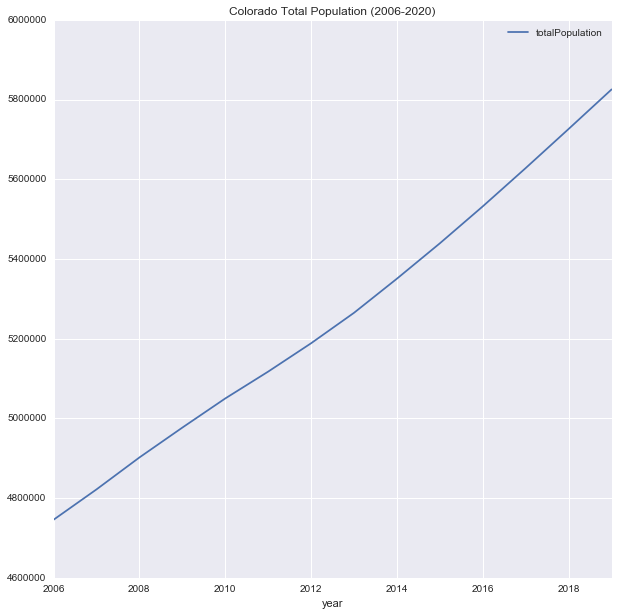

In [189]:
full_df = df.groupby(['year'], as_index=False).sum()
full_df.drop(['fipsCode', 'age', 'malePopulation', 'femalePopulation'],
             inplace = True, axis=1)
pot_df = full_df[(full_df['year'] > 2005) & (full_df['year'] < 2020)] 
                 
pot_df.plot(x = 'year', y='totalPopulation', figsize = (10,10),
            title = 'Colorado Total Population (2006-2020)')
plt.savefig('plots/co_pop_2006_2020.png')

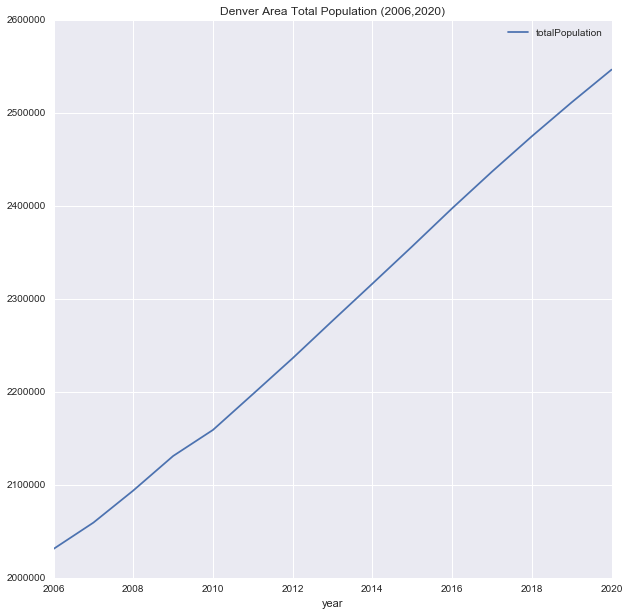

In [190]:
pot_county_df = df.groupby(['county', 'year'], as_index=False).sum()
pot_county_df.drop(['fipsCode', 'age', 'malePopulation', 'femalePopulation'],
             inplace = True, axis=1)

denv_counties = ['Denver', 'Adams', 'Arapahoe', 'Jefferson']

denver_area = pot_county_df[pot_county_df['county'].isin(denv_counties)]
da_years = denver_area.groupby('year', as_index=False).sum()
da_years[da_years['year'].isin(range(2006,2021))].plot(x = 'year', y = 'totalPopulation', figsize=(10,10),
                                                       title = 'Denver Area Total Population (2006,2020)')
plt.savefig('plots/denver_area_pop_change.png')

In [200]:
df = df.groupby(['county','year'], as_index=False).sum()
df.drop(['fipsCode', 'age','malePopulation','femalePopulation'], axis=1, inplace=True)
df.head()

,county,year,totalPopulation
0,Adams,1990,265709
1,Adams,1991,273620
2,Adams,1992,281386
3,Adams,1993,290782
4,Adams,1994,300793


In [225]:
df_2015 = df[df['year'] == 2040]

In [226]:
df_2015

,county,year,totalPopulation
50,Adams,2040,768312
101,Alamosa,2040,23900
152,Arapahoe,2040,851202
203,Archuleta,2040,22950
254,Baca,2040,4277
305,Bent,2040,6425
356,Boulder,2040,396164
407,Broomfield,2040,95866
458,Chaffee,2040,28988
509,Cheyenne,2040,2334


In [227]:
d = {}
for x in range(len(counties['features'])):
    name = counties['features'][x]['properties']['name'][:-11]
    if name in df['county'].unique():
        d[name] = counties['features'][x]
    else:
        print 'not in: ', name

ser_geo = pd.Series(d.values(), index = d.keys())
ser_geo.name = 'coordinates'

df_2015 = df_2015.join(ser_geo, on='county')
df_2015 = df_2015.join(ser_area, on='county')

In [228]:
df_2015.head()

,county,year,totalPopulation,coordinates,area
50,Adams,2040,768312,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",1167.65
101,Alamosa,2040,23900,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",722.64
152,Arapahoe,2040,851202,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",798.10
203,Archuleta,2040,22950,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",1350.18
254,Baca,2040,4277,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",2554.97


In [229]:
df_2015['pop_density'] = df_2015['totalPopulation'].div(df_2015['area'])

In [246]:
print 'pop_density max: ', df_2015['pop_density'].max()# / 500) * 9
print 'pop_density min: ', df_2015['pop_density'].min()

pop_density max:  5601.81045752
pop_density min:  0.985987996176


In [211]:
5000 / 50

100

In [213]:
# colors from
# https://gka.github.io/palettes/#colors=lightyellow,orange,deeppink,darkred|steps=7|bez=1|coL=1

colors = ['#ffffe0','#fffddb','#fffad7','#fff7d1','#fff5cd','#fff2c8',
          '#fff0c4','#ffedbf','#ffebba','#ffe9b7','#ffe5b2','#ffe3af',
          '#ffe0ab','#ffdda7','#ffdba4','#ffd9a0','#ffd69c','#ffd399',
          '#ffd196','#ffcd93','#ffca90','#ffc88d','#ffc58a','#ffc288',
          '#ffbf86','#ffbd83','#ffb981','#ffb67f','#ffb47d','#ffb17b',
          '#ffad79','#ffaa77','#ffa775','#ffa474','#ffa172','#ff9e70',
          '#ff9b6f','#ff986e','#ff956c','#fe916b','#fe8f6a','#fd8b69',
          '#fc8868','#fb8567','#fa8266','#f98065','#f87d64','#f77a63',
          '#f67862','#f57562','#f37261','#f37060','#f16c5f','#f0695e',
          '#ee665d','#ed645c','#ec615b','#ea5e5b','#e85b59','#e75859',
          '#e55658','#e45356','#e35056','#e14d54','#df4a53','#dd4852',
          '#db4551','#d9434f','#d8404e','#d53d4d','#d43b4b','#d2384a',
          '#cf3548','#cd3346','#cc3045','#ca2e43','#c72b42','#c52940',
          '#c2263d','#c0233c','#be213a','#bb1e37','#ba1c35','#b71933',
          '#b41731','#b2152e','#b0122c','#ac1029','#aa0e27','#a70b24',
          '#a40921','#a2071f','#a0051c','#9d0419','#990215','#970212',
          '#94010e','#91000a','#8e0006','#8b0000', '#8b0000']

scl = dict(zip(range(0, 101), colors))

In [215]:
def get_scl(obj):
    frac = int(obj / 50)
    return scl[frac]
    
df_2015['color'] = df_2015['pop_density'].apply(get_scl)

In [216]:
df_2015.head(3)

,county,year,totalPopulation,coordinates,area,pop_density,color
25,Adams,2015,487571,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",1167.65,417.566051,#ffebba
76,Alamosa,2015,16202,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",722.64,22.420569,#ffffe0
127,Arapahoe,2015,627056,"{u'geometry': {u'type': u'MultiPolygon', u'coo...",798.10,785.686004,#ffd9a0


In [217]:
layers_ls = []
for x in df_2015.index:
    item_dict = dict(sourcetype = 'geojson',
                     source = df_2015.ix[x]['coordinates'],
                     type = 'fill',
                     color = df_2015.ix[x]['color'])
    layers_ls.append(item_dict)

In [218]:
layers_ls

[{'color': '#ffebba',
  'source': {u'geometry': {u'coordinates': [[[[-104.582488, 39.739636],
       [-104.884646, 39.740156],
       [-104.884664, 39.747467],
       [-104.880138, 39.747428],
       [-104.880228, 39.754809],
       [-104.846932, 39.754889],
       [-104.856431, 39.758387],
       [-104.856377, 39.768673],
       [-104.832961, 39.766194999999996],
       [-104.833009, 39.769177],
       [-104.828323, 39.769155999999995],
       [-104.828229, 39.773174],
       [-104.781727, 39.773387],
       [-104.78182699999999, 39.776486],
       [-104.772149, 39.776683999999996],
       [-104.772166, 39.771466],
       [-104.763225, 39.771488],
       [-104.763126, 39.769489],
       [-104.734601, 39.769180999999996],
       [-104.734399, 39.798442],
       [-104.762606, 39.798432999999996],
       [-104.76247, 39.82298],
       [-104.666277, 39.822849999999995],
       [-104.666196, 39.814005],
       [-104.655455, 39.814048],
       [-104.655511, 39.822469999999996],
       [-104

In [219]:
colorscl = [[i * .01, v] for i,v in enumerate(scl.values())]

In [220]:
mapbox_access_token = os.environ['MAPBOX_AT']

In [221]:
data = go.Data([
            go.Scattermapbox(
                    lat = [0],
                    lon = [0],
                    marker = go.Marker(
                                  cmax=100,
                                  cmin=0,
                                  colorscale = colorscl,
                                  showscale = True,
                                  autocolorscale=False,
                                  color=range(0,101),
                                  colorbar= go.ColorBar(
                                                 len = .89
                                                        )
                                       ),
                    mode = 'markers')
                     ])


layout = go.Layout(
    title = 'Colorado 2016 Population (x 10,000)',
    height=1050,
    width=800,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers= layers_ls,
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.03,
            lon=-105.7
        ),
        pitch=0,
        zoom=5.5,
        style='light'
    ),
)

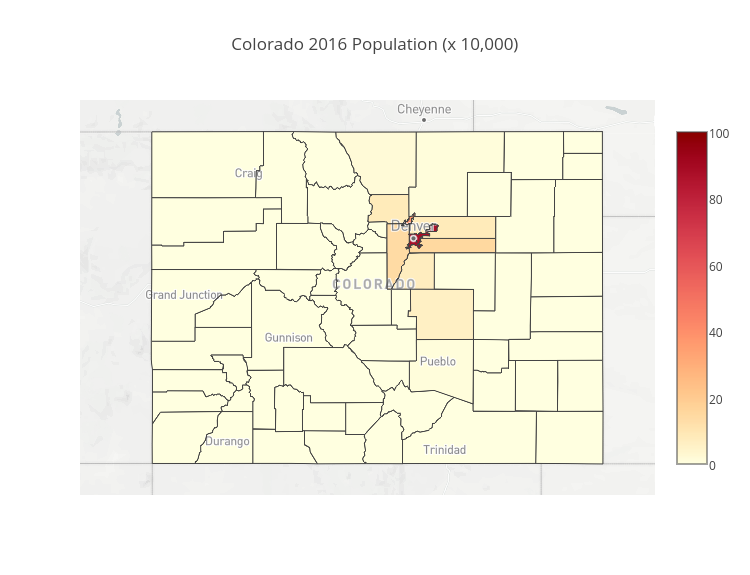

In [222]:
fig = dict(data = data, layout=layout)
fn = 'test.jpeg'
save_fn = 'images/{}'.format(fn)
h = 575
w = 750
py.image.save_as(fig, filename=save_fn, width = w, height= h)
py.image.ishow(fig, width = w, height= h)

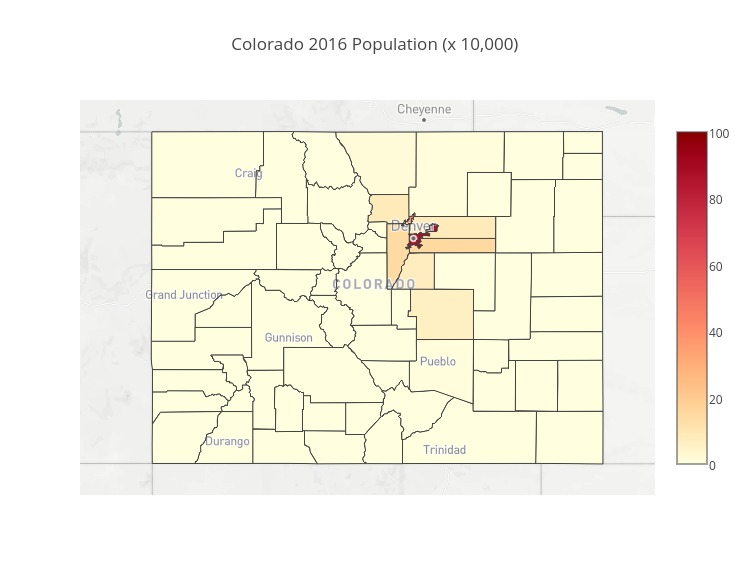

In [223]:
from IPython.display import Image

Image('images/test.jpeg')